<a href="https://colab.research.google.com/github/Five-Star-Station/Hansol_QA/blob/main/simso/train_answer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 이후 런타임 재실행

In [1]:
!pip install -q kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 44.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from kiwipiepy import Kiwi

In [3]:
plt.rc('font', family='NanumBarunGothic')

plt.style.use("seaborn-talk")
sns.set_palette('gist_earth')

<ipython-input-3-4225acc87243>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-talk")


In [16]:
plt.rc('axes', axisbelow=True)

In [11]:
def spine_off(ax, *args):
	for axis in args:
	    ax.spines[axis].set_visible(False)

# Data Load

In [4]:
base_path = '/content/drive/MyDrive/Colab Notebooks/data/dacon-hansol-qa/'
train_df = pd.read_csv(base_path + 'train.csv')
test_df = pd.read_csv(base_path + 'test.csv')
submission_df = pd.read_csv(base_path + 'sample_submission.csv')

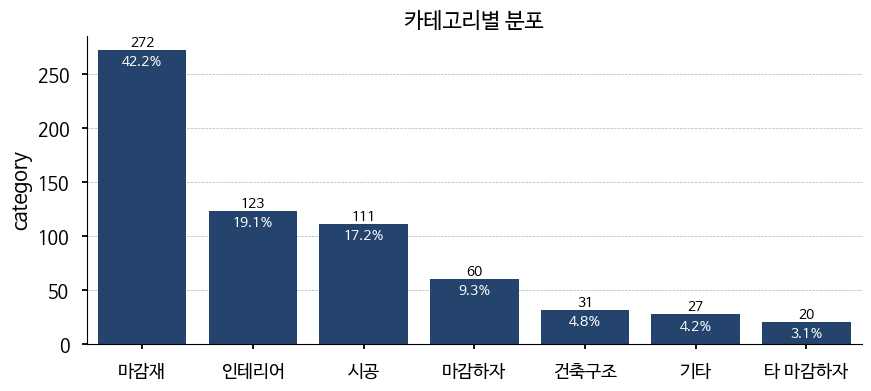

In [49]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(train_df["category"].value_counts())
ax.yaxis.grid(True, linestyle="--", linewidth=.5)
for p in ax.patches:
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    s1 = f"{int(y)}"
    s2 = f"{y/train_df.shape[0]*100:.1f}%"
    ax.text(x, y, s1, ha="center", va="bottom")
    ax.text(x, y-5, s2, ha="center", va="top", color="white")
spine_off(ax, "top", "right")
plt.title("카테고리별 분포")
plt.show()

## 카테고리별 답변 분석

In [73]:
train_label = train_df[["id", "category"]].copy()

### 마감재

In [66]:
train_df[train_df["category"] == "마감재"]

,id,질문_1,질문_2,category,답변_1,답변_2,답변_3,답변_4,답변_5
58,TRAIN_058,원목마루의 단점이 뭐야?,원목마루의 어떤 단점들이 있을까요?,마감재,원목마루는 마루 중 가장 비싼 편이고 원목이 두께감이 있어 열전도율이 낮으며 습기에...,"원목마루의 단점 중 하나는 가격이 비싸다는 것입니다. 또한, 원목이 두께가 있어서 ...","원목마루의 단점은 다음과 같습니다. 원목마루는 마루 중에 비교적 비싼 편이며, 원목...","원목마루의 단점 중 하나는 비용이 비교적 높다는 점입니다. 또한, 원목은 두께감이 ...",원목마루의 단점은 주로 비용 측면에서 언급됩니다. 원목마루는 다른 바닥재에 비해 비...
59,TRAIN_059,롱브릭타일은 뭐야?,롱브릭타일은 어떤 특징을 가지고 있나요?,마감재,모노롱브릭타일은 일반 시멘트벽돌과는 다르게 얇고 긴 모양의 타일 형태로 와이드 벽돌...,모노롱브릭타일은 벽돌의 형태를 살리면서도 노출 콘크리트와 비슷한 분위기를 연출할 수...,"롱브릭타일은 모노롱브릭타일의 다른 명칭으로, 얇고 긴 형태의 벽돌 모양을 가진 타일...","롱브릭타일은 모노롱브릭타일이라고도 불리며, 전통적인 벽돌의 형태를 가진 시멘트 벽돌...",롱브릭타일은 일반 시멘트벽돌과는 다르게 얇고 긴 모양의 타일 형태로 와이드 벽돌이라...
60,TRAIN_060,카페트는 기대수명이 얼마야?,카페트의 기대 수명은 얼마나 돼?,마감재,카페트의 기대수명은 6년입니다.,"카페트의 기대수명은 보통 6년입니다. 그러나 이는 카페트의 사용빈도, 관리방법, 카...","카페트의 기대수명은 일반적으로 6년입니다. 다만, 사용 빈도, 청소 방식, 햇빛 노...","카페트의 기대수명은 주로 6년이며, 사용빈도, 관리정도, 실내환경 등에 따라 달라질...","카페트의 기대수명은 제품의 품질과 사용 환경에 따라 다를 수 있지만, 일반적으로 6..."
61,TRAIN_061,평지붕의 단점은 뭐야?,평지붕의 단점에 대해서 좀 더 자세히 알고 싶어요.,마감재,"평지붕의 단점은 경사지붕보다 에너지 손실이 크고 단열, 방수를 위한 시공비가 많이들...","평지붕의 단점으로는 경사지붕에 비해 에너지 손실이 크고, 단열 및 방수를 위한 시공...",평지붕의 단점은 경사지붕과 비교했을 때 에너지 손실이 더 크며 단열 및 방수를 위한...,"평지붕의 단점은 경사지붕에 비해 에너지 손실이 크고, 단열 및 방수를 위한 시공비용...","평지붕의 단점은 경사지붕에 비해 에너지 손실이 크고, 단열 및 방수를 위한 시공비용..."
62,TRAIN_062,개별 공간과 오픈 플랜 공간 중 어떤 것이 나에게 더 적합한가요?,개별 공간과 오픈 플랜 공간 중에서 어떤 것이 더 나에게 알맞은 것인가요?,마감재,"개별 공간은 개인 공간과 더 많은 프라이버시를 제공하며, 오픈 플랜은 공간을 확장하...","개인 성향과 생활 방식에 따라 적합한 공간이 다를 수 있지만, 개별 공간은 개인의 ...","오픈 플랜은 공간을 확장하고 연결감을 높이는 반면, 개별 공간은 개인 공간과 더 많...","개별 공간은 개인의 공간과 더 많은 프라이버시를 제공하는 반면, 오픈 플랜은 공간을...",개별 공간과 오픈 플랜 공간은 각각의 특징을 가지고 있습니다. 개별 공간은 개인적인...
...,...,...,...,...,...,...,...,...,...
325,TRAIN_325,벽지와 도료 중 어떤 것을 선택해야 하나요?,벽지와 도료 중에서 어떤 것을 선택하는 게 좋을까요?,마감재,"벽지는 패턴과 텍스처를 추가할 때 좋고, 도료는 단색이며 부드러운 마감을 원할 때 ...",벽지와 도료는 각각의 장단점을 가지고 있습니다. 벽지는 다양한 패턴과 텍스처로 공간...,벽지와 도료 중 어떤 것을 선택할지는 공간의 디자인과 사용 용도에 따라 다를 수 있...,"벽지는 다양한 패턴과 텍스처를 추가할 수 있는 장점이 있으며, 도료는 단색이며 부드...",벽지는 다양한 패턴과 텍스처를 추가할 수 있어 공간에 풍성함을 더해주는 장점이 있습...
326,TRAIN_326,초경벽지가 뭐야?,초경벽지가 무엇인지 자세히 알려주세요.,마감재,"천연벽지에 속하는 초경벽지는 칡, 대나무, 갈대 등 식물을 그대로 가공하여 원지에 ...","초경벽지는 칡, 대나무, 갈대 등의 자연 소재를 가공하여 만든 벽지를 말합니다. 이...","초경벽지는 천연 벽지 중 하나로, 칡, 대나무, 갈대 등의 자연 소재를 가공하여 만...","초경벽지는 천연벽지 중 하나로, 칡, 대나무, 갈대 등과 같은 식물을 가공하여 원지...","초경벽지는 천연벽지 중 하나로, 칡, 대나무, 갈대 등과 같은 자연 소재를 가공하여..."
327,TRAIN_327,점토기와의 장점은 뭐야?,점토기의 장점에 대해서 자세히 알려주세요.,마감재,점토기와는 오랜 시간이 지나도 색상이 잘 변하지 않고 자연스러우며 다양한 기후 환경...,점토기와의 장점은 다양한 기후 환경에서도 색상이 변하지 않고 자연스럽다는 점입니다....,"점토기와의 장점은 다양한 기후 환경에서도 변형이나 부식이 일어나지 않고, 낮은 열전...","점토기와는 장시간이 지나도 색상이 변하지 않고 자연스럽다는 특징이 있습니다. 또한,...","점토기와의 장점은 다양한 기후 환경에서도 변형, 부식 없이 오랜 기간 사용할 수 있..."
328,TRAIN_328,석고보드의 장점을 알려줘,석고보드를 사용하는 장점에는 어떤 것들이 있을까요?,마감재,석고보드는 가볍고 재단이 간편하고 시공성이 띄어나다는 장점이 있어 시공현장에서 많이...,석고보드는 가볍고 재단이 간편하며 시공성이 뛰어나 시공 현장에서 많이 사용됩니다. ...,석고보드의 장점은 다양합니다. 가볍고 재단이 간편하며 시공성이 뛰어나다는 점뿐만 아...,석고보드는 가볍고 재단이 간편하며 시공성이 뛰어나 시공현장에서 많이 사용됩니다. 더...,석고보드는 가볍고 재단이 간편하며 시공성이 뛰어나다는 장점이 있습니다. 이러한 특성...


In [79]:
target_record = (train_df["category"] == "마감재") & (train_df["질문_1"].str.contains("장점"))
train_df[target_record]

,id,질문_1,질문_2,category,답변_1,답변_2,답변_3,답변_4,답변_5
58,TRAIN_058,원목마루의 단점이 뭐야?,원목마루의 어떤 단점들이 있을까요?,마감재,원목마루는 마루 중 가장 비싼 편이고 원목이 두께감이 있어 열전도율이 낮으며 습기에...,"원목마루의 단점 중 하나는 가격이 비싸다는 것입니다. 또한, 원목이 두께가 있어서 ...","원목마루의 단점은 다음과 같습니다. 원목마루는 마루 중에 비교적 비싼 편이며, 원목...","원목마루의 단점 중 하나는 비용이 비교적 높다는 점입니다. 또한, 원목은 두께감이 ...",원목마루의 단점은 주로 비용 측면에서 언급됩니다. 원목마루는 다른 바닥재에 비해 비...
61,TRAIN_061,평지붕의 단점은 뭐야?,평지붕의 단점에 대해서 좀 더 자세히 알고 싶어요.,마감재,"평지붕의 단점은 경사지붕보다 에너지 손실이 크고 단열, 방수를 위한 시공비가 많이들...","평지붕의 단점으로는 경사지붕에 비해 에너지 손실이 크고, 단열 및 방수를 위한 시공...",평지붕의 단점은 경사지붕과 비교했을 때 에너지 손실이 더 크며 단열 및 방수를 위한...,"평지붕의 단점은 경사지붕에 비해 에너지 손실이 크고, 단열 및 방수를 위한 시공비용...","평지붕의 단점은 경사지붕에 비해 에너지 손실이 크고, 단열 및 방수를 위한 시공비용..."
67,TRAIN_067,합지벽지의 단점이 뭐야?,합지벽지의 장점과 단점에 대해서 알려주세요.,마감재,합지벽지의 단점은 상대적으로 수명이 짧고 내구성이 약하며 오염이 생기면 닦거나 청소...,"합지벽지의 단점은 상대적으로 수명이 짧고 내구성이 약하여 금방 오염될 수 있으며, ...",합지벽지의 단점은 다른 재료에 비해 상대적으로 수명이 짧고 내구성이 약한 것이 있습...,합지벽지의 주요 단점은 상대적으로 짧은 수명과 내구성이 약하다는 점입니다. 또한 오...,합지벽지의 단점은 상대적으로 수명이 짧고 내구성이 약하며 오염이 생기면 닦거나 청소...
68,TRAIN_068,포세린 타일의 단점이 뭐야,포세린 타일을 사용하는 것의 단점은 무엇인가요?,마감재,포세린 타일은 시공 방법에 따라 하자 발생률이 높고 오염에 취약하다는 단점이 있습니다.,포세린 타일의 단점 중 하나로는 시공 방법에 따라 하자 발생률이 높을 수 있다는 점...,"포세린 타일은 시공 방법에 따라 하자 발생률이 높을 수 있고, 또한 오염에 취약하다...","포세린 타일의 단점으로는 시공 방법에 따라 하자 발생률이 높을 수 있고, 오염에 취...",포세린 타일은 시공 방법에 따라 하자 발생률이 높고 오염에 취약하다는 단점이 있습니...
69,TRAIN_069,셀룰로오스의 단점이 뭐야?,셀룰로오스의 단점은 무엇인가요?,마감재,셀룰로오스는 정밀한 시공능력이 전제된다는 단점이 있습니다.,"셀룰로오스의 단점으로는 정밀한 시공능력이 요구된다는 점이 있습니다. 즉, 시공과정에...",셀룰로오스의 단점 중 하나는 정밀한 시공능력이 요구된다는 점입니다. 이는 경험이 부...,셀룰로오스의 단점 중 하나는 정밀한 시공 능력이 요구된다는 점입니다. 시공과정에서 ...,"셀룰로오스의 단점은, 정밀한 시공 능력이 필요하다는 점입니다. 셀룰로오스는 정확한 ..."
76,TRAIN_076,큐블럭의 단점이 뭐야?,큐블럭의 단점에 대해서 자세히 알고 싶습니다.,마감재,큐블럭은 일반 벽돌에 비해 가격이 비싸고 균열이 생기기 쉬우며 습기로 인해 하자가 ...,"큐블럭은 일반 벽돌에 비해 높은 비용과 균열이 쉽게 생길 수 있는 점, 그리고 습기...","큐블럭의 가격이 일반 벽돌에 비해 상대적으로 높고, 균열이 쉽게 생기며 습기로 인해...","큐블럭의 단점은 주로 가격이 상대적으로 비싸다는 점, 그리고 균열이 일반 벽돌에 비...","큐블럭의 주요 단점으로는 일반 벽돌에 비해 비싼 가격과 균열 발생 가능성, 습기로 ..."
79,TRAIN_079,KMEW 세라믹 지붕재의 단점이 뭐야?,KMEW 세라믹 지붕재의 단점은 무엇인가요?,마감재,KMEW 세라믹 지붕재는 수입품이라 가격이 비싸고 금속지붕에 비해 무겁다는 것이 단...,"KMEW 세라믹 지붕재의 단점은 주로 수입품이기 때문에 가격이 비싸며, 금속지붕에 ...",KMEW 세라믹 지붕재의 단점 중 하나는 가격이 비싸다는 것입니다. 또 다른 단점으...,"KMEW 세라믹 지붕재의 주요 단점은 수입품이기 때문에 가격이 비싸며, 또한 금속 ...",KMEW 세라믹 지붕재의 주된 단점은 가격이 비싸고 무게가 무겁다는 것입니다. 또한...
82,TRAIN_082,비드법 보온판 2종의 단점은 뭐야?,비드법 보온판 2종의 어떤 단점들이 있는지 알려주세요.,마감재,비드법 보온판 2종은 숙성기간이 필요하며 열에 취약하다는 단점이 있습니다.,비드법 보온판 2종의 또 다른 단점은 관리가 어려우며 시공 중에 매우 민감하다는 점...,비드법 보온판 2종의 단점 중 하나는 숙성기간이 필요하다는 점입니다. 또한 열에 취...,비드법 보온판 2종의 단점은 숙성기간이 필요하고 열에 취약하다는 점입니다. 또한 보...,비드법 보온판 2종의 단점으로는 숙성기간이 필요하고 열에 취약하다는 점이 있습니다....
91,TRAIN_091,원목사이딩의 단점이 뭐야?,원목사이딩을 사용하는데 어떤 단점이 있을까요?,마감재,"원목사이딩의 단점은 가격대가 높고 관리가 어려우며 습기에 약해 뒤틀림, 부서짐, 수...","원목사이딩의 단점은 주로 높은 비용, 유지보수의 어려움, 습기에 대한 취약성으로 인...","원목사이딩의 단점은 가격대가 높을 뿐 아니라 관리가 어렵고 습기에 민감하여 뒤틀림,...",원목사이딩의 단점은 주로 가격대가 높고 관리가 어렵다는 점입니다. 또한 습기에 약해...,"원목사이딩의 장점은 있으나, 단점으로는 가격대가 높고 관리가 어려우며 습기에 약해 ..."
93,TRAIN_093,폴리싱 타일의 단점이 뭐야?,폴리싱 타일을 사용하는 것에 대한 주요 단점이 무엇인가요?,마감재,폴리싱 타일은 시공이 어려워 하자가 발생할 확률이 높고 숙련도가 높은 기술자가 담당...,폴리싱 타일은 시공이 어려워 하자가 발생할 확률이 높고 숙련도가 높은 기술자가 담당...,"폴리싱 타일의 단점으로는 시공이 어려워 하자가 발생할 확률이 높고, 숙련된 기술자가...",폴리싱 타일의 가격과 시공비가 보다 높은 편에 있어서 비용 부담이 크다는 점이 단점...,"폴리싱 타일의 단점으로는 시공이 어렵기 때문에 하자가 발생할 확률이 높고, 이를 시..."


In [78]:
train_label.loc[target_record, "q1_장점"] = True

In [72]:
train_df[(train_df["category"] == "마감재") & (train_df["질문_1"].str.contains("단점") | train_df["질문_2"].str.contains("단점")) & (~train_label["q_type"].isna())]

,id,질문_1,질문_2,category,답변_1,답변_2,답변_3,답변_4,답변_5
67,TRAIN_067,합지벽지의 단점이 뭐야?,합지벽지의 장점과 단점에 대해서 알려주세요.,마감재,합지벽지의 단점은 상대적으로 수명이 짧고 내구성이 약하며 오염이 생기면 닦거나 청소...,"합지벽지의 단점은 상대적으로 수명이 짧고 내구성이 약하여 금방 오염될 수 있으며, ...",합지벽지의 단점은 다른 재료에 비해 상대적으로 수명이 짧고 내구성이 약한 것이 있습...,합지벽지의 주요 단점은 상대적으로 짧은 수명과 내구성이 약하다는 점입니다. 또한 오...,합지벽지의 단점은 상대적으로 수명이 짧고 내구성이 약하며 오염이 생기면 닦거나 청소...
139,TRAIN_139,탄화목사이딩의 단점이 뭐야?,탄화목사이딩의 장점은 무엇인가요?,마감재,탄화목사이딩의 단점은 열처리 비용으로 가격이 높고 어두운 색으로 인해 호불호가 갈리...,"탄화목사이딩의 단점은 몇 가지가 있습니다. 먼저, 열처리 과정으로 제작하는 탓에 가...","탄화목사이딩의 단점은 예열 처리 과정으로 인한 비용 부담이 있으며, 사용자의 취향에...","탄화목사이딩의 단점은 먼저, 열처리 공정을 거치기 때문에 가격이 상대적으로 높다는 ...","탄화목사이딩의 단점은 목재에 열처리를 하기 때문에 가격이 상대적으로 높을 수 있고,..."
145,TRAIN_145,비드법 보온판 1종의 단점이 뭐야?,비드법 보온판 1종의 장점은 무엇인가요?,마감재,비드법 보온판 1종은 7주 이상의 숙성 과정을 거쳐야 하고 물에 닿으면 단열 성능이...,비드법 보온판 1종의 단점은 다양한 부작용을 가지고 있습니다. 이 제품은 7주 이상...,비드법 보온판 1종의 단점은 다음과 같습니다. 1. 숙성 과정이 길어야 함: 비드법...,"비드법 보온판 1종의 단점으로는 7주 이상의 숙성 과정이 필요하다는 점, 물에 노출...",비드법 보온판 1종의 단점은 다음과 같습니다. 1. 7주 이상의 숙성 과정을 거쳐야...
156,TRAIN_156,점토기와의 단점이 뭐야?,점토기와의 장점은 무엇인가요?,마감재,점토기와는 다른 지붕 마감재보다 비싼 편이며 무겁고 충격에 파손될 수 있습니다.,점토기와는 다른 지붕 마감재보다 비싼 편이며 무겁고 충격에 파손될 수 있는 단점이 ...,점토기와는 다른 지붕 마감재들에 비해 상대적으로 비싼 편이며 무게가 매우 무겁고 충...,점토기와의 단점은 다른 지붕 마감재보다 상대적으로 비싼 가격과 높은 무게 때문에 추...,"점토기와는 다른 지붕 마감재에 비해 상대적으로 높은 비용이 들며, 무게가 무거워서 ..."
159,TRAIN_159,실크벽지의 단점이 뭐야?,실크벽지의 장점은 무엇인가요?,마감재,"실크벽지는 가격대가 높고 친환경적이지 않으며 통기성, 흡수성이 좋지 않다는 단점이 ...",실크벽지의 단점으로는 가격대가 높고 친환경적이지 않다는 점을 들 수 있습니다. 또한...,실크벽지는 특히 가격대가 비싸고 친환경적이지 않으며 통기성과 흡수성이 다소 떨어진다...,"실크벽지는 고가의 가격대와 친환경적이지 않은 소재, 그리고 통기성과 흡수성이 떨어진...",실크벽지의 단점으로는 가격대가 높을 뿐만 아니라 친환경적이지 않고 통기성과 흡수성이...
167,TRAIN_167,오리지널징크의 단점이 뭐야?,오리지널징크의 장점은 무엇인가요?,마감재,오리지널징크는 다른 징크에 비해 가격이 높은 것이 단점입니다.,"오리지널징크의 단점은 다른 징크에 비해 가격이 상대적으로 높다는 것입니다. 또한, ...",오리지널 징크의 단점으로는 비교적 다른 징크에 비해 높은 가격이 있습니다. 그러나 ...,오리지널 징크의 단점은 다른 징크에 비해 비교적 높은 가격이라는 점입니다. 이러한 ...,오리지널징크의 단점 중 하나는 가격이 다른 징크에 비해 비교적 높다는 점입니다. 하...
190,TRAIN_190,노출콘크리트가 뭐야?,노출콘크리트의 장점과 단점에 대해 알고 싶습니다.,마감재,노출콘크리트란 콘크리트를 그대로 건물의 외피로 사용하는 것을 의미합니다.,"노출콘크리트란 콘크리트를 그대로 건물의 외피로 사용하는 것을 의미합니다. 즉, 콘크...",노출콘크리트란 콘크리트를 그대로 건물의 외피로 사용하는 것을 의미합니다. 이는 콘크...,노출콘크리트란 콘크리트를 그대로 건물의 외벽 및 내부 구조물 등에 사용하여 콘크리트...,노출콘크리트란 콘크리트를 그대로 건물의 외피로 사용하는 것을 의미합니다. 이는 콘크...
195,TRAIN_195,노출콘크리트의 장점이 뭐야?,노출콘크리트의 단점은 무엇인가요?,마감재,노출콘크리트는 모던하며 다양한 인테리어 효ㅕ과와 공간의 확장감을 주고 별도의 마감재...,"노출콘크리트의 장점은 모던하며 공간의 확장감을 주고, 별도의 마감재가 필요하지 않으...","노출콘크리트의 장점은 모던한 느낌과 공간 확장감, 특별한 마감재 없이도 사용할 수 ...","노출콘크리트의 장점은 먼저, 모던하고 다양한 인테리어 효과와 공간의 확장감을 주어 ...",노출콘크리트의 장점으로는 모던한 느낌과 함께 다양한 인테리어 효과와 공간의 확장감을...
235,TRAIN_235,천연벽지에 대해 알려줘,천연벽지의 장점과 단점에 대해 알고 계신가요?,마감재,"천연벽지란 편백나무, 옥수수, 쑥 등 천연성분으로 코팅한 벽지입니다. 가격은 200...","천연벽지는 편백나무, 옥수수, 쑥 등과 같은 천연성분으로 코팅한 벽지를 말합니다. ...","천연벽지는 천연 재료인 편백나무, 옥수수, 쑥 등으로 코팅한 벽지를 말합니다. 이러...","천연벽지는 천연성분으로 코팅된 벽지로, 편백나무, 옥수수, 쑥 등이 사용됩니다. 이...","천연벽지는 편백나무, 옥수수, 쑥 등의 천연 성분으로 코팅된 벽지를 말합니다. 이러..."
236,TRAIN_236,포세린 타일이 뭐야?,포세린 타일의 장점과 단점에 대해서 알고 싶어요.,마감재,포세린 타일이란 점토를 주원료로 만들어진 무광의 타일을 의미합니다. 가격은 평당 1...,포세린 타일은 주로 점토를 사용하여 만들어지는 무광의 타일을 말합니다. 이러한 타일...,포세린 타일은 점토를 기본 재료로 사용하여 만든 무광의 타일을 말합니다. 이러한 타...,포세린 타일은 점토를 주원료로 만들어진 무광의 타일을 말합니다. 이는 여름에는 시원...,포세린 타일은 점토를 기본 재료로 사용하여 만든 무광의 타일을 말합니다. 이러한 타...
